### Importing Relevant Modules

In [14]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr 

### Loading in Data

In [3]:
df = pd.read_csv('developer_dataset.csv')
print(df.head())


   RespondentID  Year        Country          Employment  \
0             1  2018  United States  Employed full-time   
1             1  2019  United States  Employed full-time   
2             1  2020  United States  Employed full-time   
3             2  2018  United States  Employed full-time   
4             2  2019  United States  Employed full-time   

                                      UndergradMajor  \
0  Computer science, computer engineering, or sof...   
1  Computer science, computer engineering, or sof...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                                             DevType  \
0           Engineering manager;Full-stack developer   
1                              Developer, full-stack   
2                                                NaN   
3                               Full-stack developer   
4  Data or business an

/var/folders/6n/kbp6rf8113v90w7l423tdxhr0000gn/T/ipykernel_14241/730363606.py:1: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


### Sorting Data

In [ ]:
df.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn'], axis = 1, inplace = True)

Selecting Columns Needed For Analysis

In [5]:
sub_df = df[['Year', 'YearsCodePro', 'ConvertedComp']]
print(sub_df)

        Year  YearsCodePro  ConvertedComp
0       2018           NaN       141000.0
1       2019           1.0        61000.0
2       2020           8.0            NaN
3       2018           4.0        48000.0
4       2019           8.0        90000.0
...      ...           ...            ...
111204  2018           NaN            NaN
111205  2018          13.0        98000.0
111206  2018          11.0            NaN
111207  2018           NaN        35000.0
111208  2018           NaN        45000.0

[111209 rows x 3 columns]


Inspecting the Data

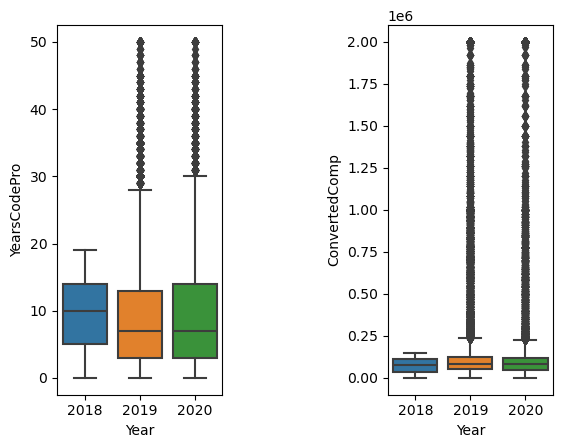

<Figure size 640x480 with 0 Axes>

In [9]:
plt.subplot(1,2,1)
sns.boxplot(data = sub_df, x = 'Year', y = 'YearsCodePro')
plt.subplot(1,2,2)
sns.boxplot(data = sub_df, x = 'Year', y = 'ConvertedComp')
plt.subplots_adjust(wspace = 1)
plt.show()
plt.clf()

Filling Null Values With Multiple Imputation

In [11]:
impute_df = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(impute_df, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(impute_df)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(impute_df),0), columns=['YearsCodePro','ConvertedComp'])

Exclude Outliers

In [15]:
compdf = compdf[compdf['ConvertedComp'] < 300000]

Plotting Comp vs Years Experience

/Users/abhikvinod/miniconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


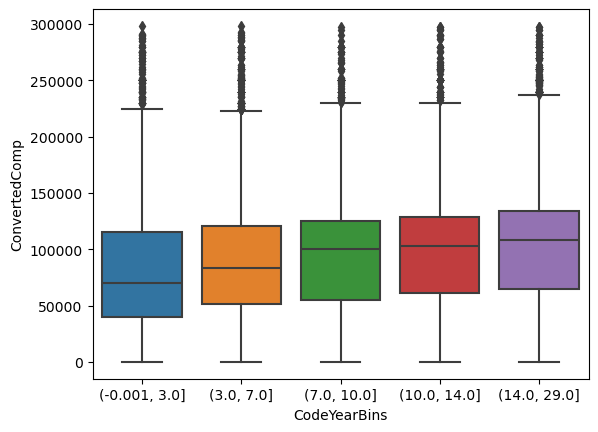

In [22]:
#sns.scatterplot(data = compdf, x = 'YearsCodePro', y = 'ConvertedComp', alpha = 0.2)
#scatter wasn't the best way to view information
compdf['CodeYearBins'] = pd.qcut(compdf['YearsCodePro'], q=5)
sns.boxplot(data =compdf, x= 'CodeYearBins', y = 'ConvertedComp')
plt.show()